---
<h1 style="text-align: center;">Lista 5 - Exercícios Redes Neurais:</h1>
<h2 style="text-align: center;">
    <a href="https://github.com/Jodavid" target="_blank" style="color: blue; text-decoration: underline;">
        Prof. Dr. Jodavid Ferreira
    </a>
</h2>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 05/08/2024

---
---

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Input, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

---

1. **Crie uma rede neural totalmente conectada com duas camadas ocultas, cada uma com 128 neurônios, utilizando a biblioteca keras. Utilize a função de ativação ReLU e a função de perda categorical_crossentropy para treinar o modelo no conjunto de dados abaixo:**

* Base de dados: https://www.kaggle.com/datasets/abdelazizsami/wine-quality

In [2]:
wine_white = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/listas/05/data/winequality-white.csv",
    sep=";",
)
wine_red = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/listas/05/data/winequality-red.csv",
    sep=";",
)

In [3]:
wine_white["color"] = 0
wine_red["color"] = 1

In [4]:
df = pd.concat([wine_white, wine_red], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [6]:
X = df.drop(columns="quality")
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [7]:
y = df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
def nn():
    model = models.Sequential()
    model.add(Dense(128, activation="relu", input_shape=(X.shape[1],)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [10]:
model = nn()
model.summary()

/home/gabrieldadcarvalho/anaconda3/envs/am/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1725710844.342142    5703 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-07 09:07:24.647356: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required librarie

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=100, validation_split=0.3
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3783 - loss: 5.3453 - val_accuracy: 0.4615 - val_loss: 1.2647
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4085 - loss: 1.3216 - val_accuracy: 0.4256 - val_loss: 1.2675
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4472 - loss: 1.2763 - val_accuracy: 0.4520 - val_loss: 1.2333
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4386 - loss: 1.2639 - val_accuracy: 0.4161 - val_loss: 1.2601
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 1.2986 - val_accuracy: 0.3656 - val_loss: 1.4169
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4448 - loss: 1.2560 - val_accuracy: 0.4381 - val_loss: 1.2127
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4614 - loss: 1.2520 - val_accuracy: 0.4278 - val_loss: 1.2173
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4489 - loss: 1.2522 - val_accu

---

2. **Modifique o modelo anterior para incluir uma camada de Dropout após cada camada oculta, utilizando uma taxa de dropout de 0.5. Explique como o Dropout ajuda a prevenir o overfitting no modelo.**

In [15]:
def nn_drop():
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo

In [16]:
modelo = nn_drop()

In [17]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hisotry_dropout = modelo.fit(
    X_train, y_train, batch_size=32, epochs=100, validation_split=0.3
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2845 - loss: 11.3594 - val_accuracy: 0.3597 - val_loss: 1.5092
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3265 - loss: 2.7991 - val_accuracy: 0.3487 - val_loss: 1.3304
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 1.8299 - val_accuracy: 0.4220 - val_loss: 1.3086
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3785 - loss: 1.5527 - val_accuracy: 0.4220 - val_loss: 1.3172
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4116 - loss: 1.5066 - val_accuracy: 0.4220 - val_loss: 1.2601
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4235 - loss: 1.4017 - val_accuracy: 0.4212 - val_loss: 1.2642
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4240 - loss: 1.4080 - val_accuracy: 0.4220 - val_loss: 1.2512
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4353 - loss: 1.3543 - val_acc

**O dropout ajuda o modelo a previnir overfiting, modificando a estruturada da rede a cada época. Ele desativa aleatoriamente alguns neurônios, o que impede que certos pesos se ajustem excessivamente, forçando o modelo a ser mais robusto e generalizando melhor**

---

3. **Treine e avalie o desempenho do modelo original (sem Dropout) e do modelo com Dropout no conjunto de dados MNIST utilizando valores de 0.2, 0.5, e 0.8 para o Dropout. Compare as curvas de perda e acurácia durante o treinamento e comente sobre os resultados. Avalie também o impacto dessas variações no desempenho do modelo e na capacidade de generalização.**


In [7]:
# Carregando conjunto de dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
X_train.shape

(60000, 28, 28)

In [3]:
def nn_mnist():
    modelo = models.Sequential()
    modelo.add(Flatten(input_shape=(28, 28)))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo


def nn_mnist_d02():
    modelo = models.Sequential()
    modelo.add(Flatten(input_shape=(28, 28)))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo


def nn_mnist_d05():
    modelo = models.Sequential()
    modelo.add(Flatten(input_shape=(28, 28)))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo


def nn_mnist_d08():
    modelo = models.Sequential()
    modelo.add(Flatten(input_shape=(28, 28)))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.8))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.8))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo

In [11]:
modelo_mnist = nn_mnist()
modelo_mnist2 = nn_mnist_d02()
modelo_mnist5 = nn_mnist_d05()
modelo_mnist8 = nn_mnist_d08()

/home/gabrieldadcarvalho/anaconda3/envs/am/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
hist_mnist = modelo_mnist.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.4504 - val_accuracy: 0.9628 - val_loss: 0.1303
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9656 - loss: 0.1129 - val_accuracy: 0.9673 - val_loss: 0.1170
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.0715 - val_accuracy: 0.9682 - val_loss: 0.1197
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0515 - val_accuracy: 0.9681 - val_loss: 0.1138
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0381 - val_accuracy: 0.9694 - val_loss: 0.1180
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9694 - val_loss: 0.1236
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9910 - loss: 0.0262 - val_accuracy: 0.9758 - val_loss: 0.1074
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0195 - 

In [12]:
hist_mnist2 = modelo_mnist2.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8293 - loss: 0.5578 - val_accuracy: 0.9563 - val_loss: 0.1425
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1680 - val_accuracy: 0.9659 - val_loss: 0.1128
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9601 - loss: 0.1270 - val_accuracy: 0.9676 - val_loss: 0.1093
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9668 - loss: 0.1078 - val_accuracy: 0.9723 - val_loss: 0.0917
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9716 - loss: 0.0918 - val_accuracy: 0.9762 - val_loss: 0.0844
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0786 - val_accuracy: 0.9731 - val_loss: 0.0936
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9755 - loss: 0.0739 - val_accuracy: 0.9733 - val_loss: 0.0928
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0709 - 

In [13]:
hist_mnist5 = modelo_mnist5.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7085 - loss: 0.8883 - val_accuracy: 0.9428 - val_loss: 0.1900
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9068 - loss: 0.3211 - val_accuracy: 0.9570 - val_loss: 0.1491
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2629 - val_accuracy: 0.9617 - val_loss: 0.1306
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9302 - loss: 0.2330 - val_accuracy: 0.9629 - val_loss: 0.1251
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9386 - loss: 0.2115 - val_accuracy: 0.9659 - val_loss: 0.1162
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9416 - loss: 0.2006 - val_accuracy: 0.9668 - val_loss: 0.1121
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9443 - loss: 0.1880 - val_accuracy: 0.9697 - val_loss: 0.1081
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9466 - loss: 0.1760 - 

In [14]:
hist_mnist8 = modelo_mnist8.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3620 - loss: 1.7957 - val_accuracy: 0.8963 - val_loss: 0.4768
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6803 - loss: 0.9779 - val_accuracy: 0.9112 - val_loss: 0.3928
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7188 - loss: 0.8848 - val_accuracy: 0.9204 - val_loss: 0.3436
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7370 - loss: 0.8431 - val_accuracy: 0.9200 - val_loss: 0.3295
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7459 - loss: 0.8038 - val_accuracy: 0.9227 - val_loss: 0.3333
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.7912 - val_accuracy: 0.9268 - val_loss: 0.2973
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.7770 - val_accuracy: 0.9289 - val_loss: 0.2917
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7572 - loss: 0.7641 - 

In [47]:
acc_mnist = hist_mnist.history["accuracy"]
loss_mnist = hist_mnist.history["loss"]
acc_val_mnist = hist_mnist.history["val_accuracy"]
loss_val_mnist = hist_mnist.history["val_loss"]

acc_mnist2 = hist_mnist2.history["accuracy"]
loss_mnist2 = hist_mnist2.history["loss"]
acc_val_mnist2 = hist_mnist2.history["val_accuracy"]
loss_val_mnist2 = hist_mnist2.history["val_loss"]

acc_mnist5 = hist_mnist5.history["accuracy"]
loss_mnist5 = hist_mnist5.history["loss"]
acc_val_mnist5 = hist_mnist5.history["val_accuracy"]
loss_val_mnist5 = hist_mnist5.history["val_loss"]

acc_mnist8 = hist_mnist8.history["accuracy"]
loss_mnist8 = hist_mnist8.history["loss"]
acc_val_mnist8 = hist_mnist8.history["val_accuracy"]
loss_val_mnist8 = hist_mnist8.history["val_loss"]

In [26]:
[i for i in range(0, 10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

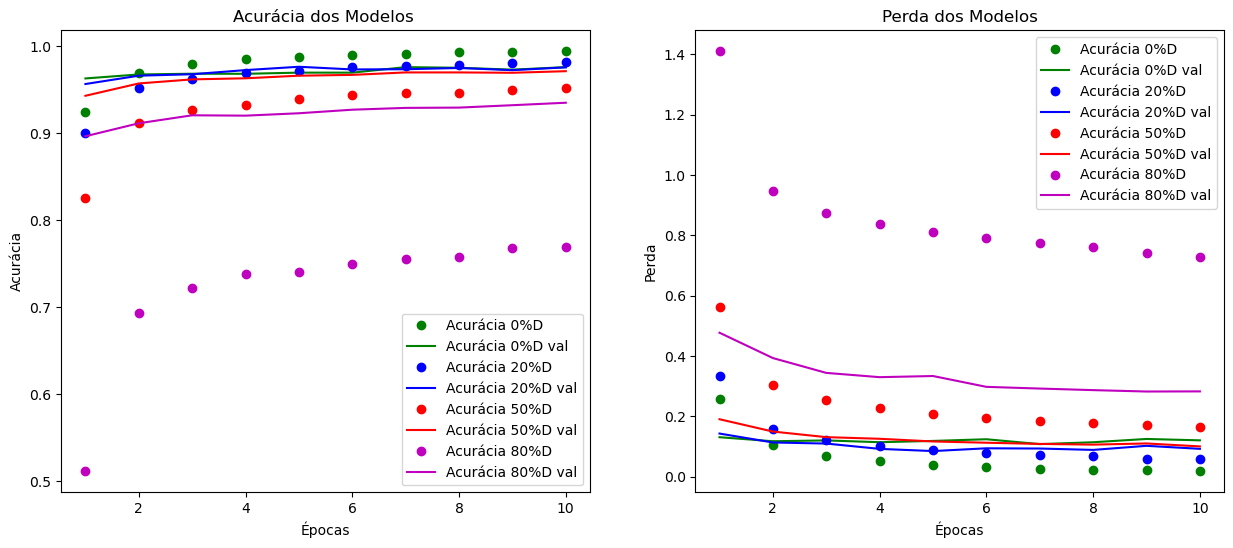

In [50]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc_mnist) + 1), acc_mnist, "go", label="Acurácia 0%D")
plt.plot(range(1, len(acc_mnist) + 1), acc_val_mnist, "g", label="Acurácia 0%D val")
plt.plot(range(1, len(acc_mnist) + 1), acc_mnist2, "bo", label="Acurácia 20%D")
plt.plot(range(1, len(acc_mnist) + 1), acc_val_mnist2, "b", label="Acurácia 20%D val")
plt.plot(range(1, len(acc_mnist) + 1), acc_mnist5, "ro", label="Acurácia 50%D")
plt.plot(range(1, len(acc_mnist) + 1), acc_val_mnist5, "r", label="Acurácia 50%D val")
plt.plot(range(1, len(acc_mnist) + 1), acc_mnist8, "mo", label="Acurácia 80%D")
plt.plot(range(1, len(acc_mnist) + 1), acc_val_mnist8, "m", label="Acurácia 80%D val")
plt.ylabel("Acurácia")
plt.xlabel("Épocas")
plt.title("Acurácia dos Modelos")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(acc_mnist) + 1), loss_mnist, "go", label="Acurácia 0%D")
plt.plot(range(1, len(acc_mnist) + 1), loss_val_mnist, "g", label="Acurácia 0%D val")
plt.plot(range(1, len(acc_mnist) + 1), loss_mnist2, "bo", label="Acurácia 20%D")
plt.plot(range(1, len(acc_mnist) + 1), loss_val_mnist2, "b", label="Acurácia 20%D val")
plt.plot(range(1, len(acc_mnist) + 1), loss_mnist5, "ro", label="Acurácia 50%D")
plt.plot(range(1, len(acc_mnist) + 1), loss_val_mnist5, "r", label="Acurácia 50%D val")
plt.plot(range(1, len(acc_mnist) + 1), loss_mnist8, "mo", label="Acurácia 80%D")
plt.plot(range(1, len(acc_mnist) + 1), loss_val_mnist8, "m", label="Acurácia 80%D val")
plt.ylabel("Perda")
plt.xlabel("Épocas")
plt.title("Perda dos Modelos")
plt.legend()

**Nos dois gráficos acima, podemos visualizar a variação da acurácia à esquerda e da perda à direita ao longo de 10 épocas dos modelos de redes neurais usados para classificar números manuscritos, utilizando o banco de dados MNIST. O primeiro modelo é composto por 2 camadas ocultas, cada uma com 128 neurônios e funções de ativação *ReLU*. A camada de saída possui 10 neurônios com ativação *softmax*. Os outros 3 modelos diferem apenas na taxa de dropout aplicada às duas camadas ocultas, sendo 20%, 50% e 80%.**

**É interessante observar, no gráfico de acurácia, que o modelo sem dropout obteve uma maior precisão nos dados de treinamento. No entanto, quando comparamos com o modelo que desativou aleatoriamente 20% dos neurônios durante o treinamento, este apresentou uma melhor precisão nos dados de validação. No gráfico de perda, podemos ver que o modelo com 20% de dropout teve uma perda menor nos dados de validação em relação ao modelo sem dropout. Portanto, podemos concluir que uma taxa de 20% de dropout torna o modelo mais robusto e com melhor capacidade de generalização.**

**Por outro lado, ao analisarmos o modelo com 80% de dropout, é possível identificar um caso de underfitting, onde o modelo apresenta baixa precisão. Isso pode ocorrer devido à alta taxa de dropout, que reduz demais a capacidade de aprendizado do modelo, ou devido a uma quantidade insuficiente de dados ou desequilíbrio entre as classes.**

In [52]:
# Salvando modelos
modelo_mnist.save("modelo_mnist.h5")
modelo_mnist2.save("modelo_mnist2.h5")
modelo_mnist5.save("modelo_mnist5.h5")
modelo_mnist8.save("modelo_mnist8.h5")

In [11]:
from PIL import Image

In [56]:
# Testando os modelos
from PIL import Image

img = Image.open("/home/gabrieldadcarvalho/Pictures/1.png").convert("L")
img = img.resize((28, 28))
img_array = np.array(img)
t = img_array.astype("float32") / 255.0
t = np.expand_dims(t, axis=0)
print(
    [
        np.argmax(modelo_mnist.predict(t)),
        np.argmax(modelo_mnist2.predict(t)),
        np.argmax(modelo_mnist5.predict(t)),
        np.argmax(modelo_mnist8.predict(t)),
    ]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[6, 1, 1, 1]


---

4. **Crie um modelo de rede neural totalmente conectada para classificar imagens do conjunto de dados CIFAR-10. Adicione Dropout, e explique como essas técnicas contribuem para o treinamento de redes neurais.**

In [77]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [78]:
X_train, X_test = X_train.astype("float32") / 255.0, X_test.astype("float32") / 255.0

In [80]:
X_train, X_test = tf.image.rgb_to_grayscale(X_train), tf.image.rgb_to_grayscale(X_test)

2024-09-09 11:09:11.887464: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


In [83]:
X_train.shape

TensorShape([50000, 32, 32, 1])

In [84]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [88]:
def nn_cifar10():
    modelo = models.Sequential()
    modelo.add(Flatten(input_shape=(32, 32)))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(10, activation="softmax"))
    modelo.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return modelo

In [89]:
modelo_cifar10 = nn_cifar10()

/home/gabrieldadcarvalho/anaconda3/envs/am/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
hist_cifar10 = modelo_cifar10.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3313 - loss: 1.8509 - val_accuracy: 0.3423 - val_loss: 1.8345
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3348 - loss: 1.8445 - val_accuracy: 0.3516 - val_loss: 1.8182
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3359 - loss: 1.8373 - val_accuracy: 0.3565 - val_loss: 1.8164
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3400 - loss: 1.8389 - val_accuracy: 0.3549 - val_loss: 1.8160
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3399 - loss: 1.8333 - val_accuracy: 0.3576 - val_loss: 1.8097
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3440 - loss: 1.8221 - val_accuracy: 0.3619 - val_loss: 1.8035
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3441 - loss: 1.8189 - val_accuracy: 0.3577 - val_loss: 1.8031
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3497 -

In [100]:
acc, loss = hist_cifar10.history['accuracy'], hist_cifar10.history['loss']
acc_vall, loss_vall = hist_cifar10.history['val_accuracy'], hist_cifar10.history['val_loss']

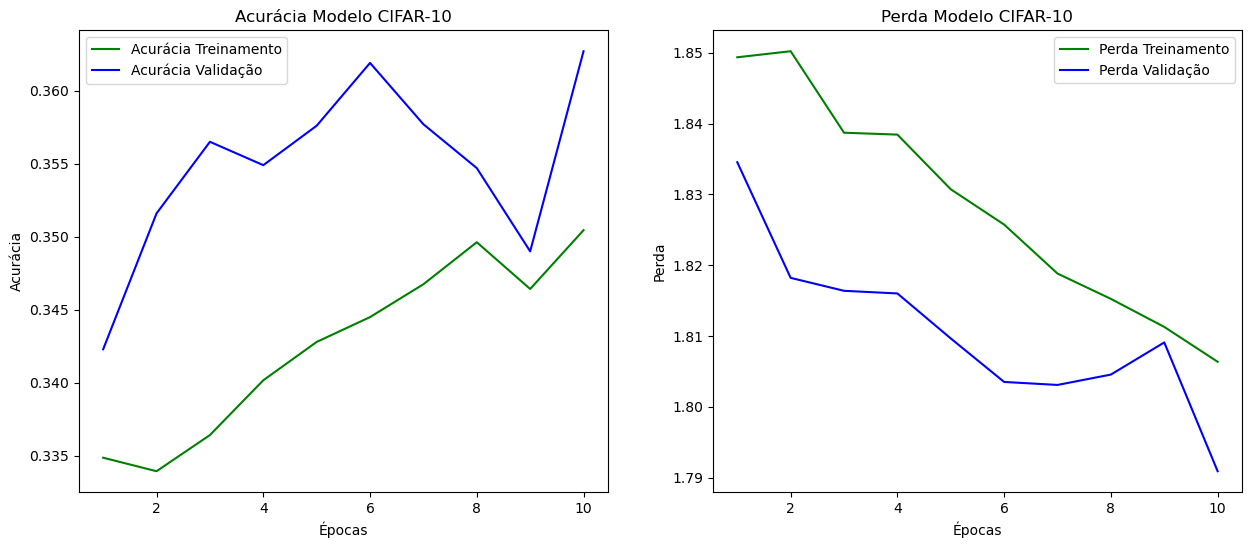

In [103]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), acc, 'g', label='Acurácia Treinamento')
plt.plot(range(1, 11), acc_vall, 'b', label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia Modelo CIFAR-10')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), loss, 'g', label='Perda Treinamento')
plt.plot(range(1, 11), loss_vall, 'b', label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda Modelo CIFAR-10')
plt.legend()
plt.show()

**Como comentado anteriormente, a técnica de dropout contribui para o modelo de machine learning porque ele colabora para que o modelo não altere os mesmos parâmetros demasiadamente, fazendo com que o modelo seja mais robusto e generalizado.**

---

5. **Substitua a função de ativação ReLU pela Sigmoide e o otimizador Adam por RMSprop. Treine o modelo e analise como essas mudanças afetam o desempenho da rede.**

In [115]:
def nn_cifar10_s():
  modelo = models.Sequential()
  modelo.add(Flatten(input_shape=(32, 32)))
  modelo.add(Dense(800, activation='sigmoid'))
  modelo.add(Dropout(0.2))
  modelo.add(Dense(800, activation='sigmoid'))
  modelo.add(Dropout(0.2))
  modelo.add(Dense(10, activation='softmax'))
  modelo.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return modelo

In [116]:
modelo_cifar10_s = nn_cifar10_s()

In [117]:
hist_cifar10_s = modelo_cifar10_s.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.1846 - loss: 2.2528 - val_accuracy: 0.2848 - val_loss: 1.9871
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2889 - loss: 1.9756 - val_accuracy: 0.3156 - val_loss: 1.9007
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3150 - loss: 1.9051 - val_accuracy: 0.3383 - val_loss: 1.8515
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3306 - loss: 1.8656 - val_accuracy: 0.3366 - val_loss: 1.8360
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3400 - loss: 1.8394 - val_accuracy: 0.3532 - val_loss: 1.8204
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.3468 - loss: 1.8266 - val_accuracy: 0.3502 - val_loss: 1.8217
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.3516 - loss: 1.8182 - val_accuracy: 0.3578 - val_loss: 1.7947
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3546 -

In [118]:
acc, loss = hist_cifar10_s.history['accuracy'], hist_cifar10_s.history['loss']
acc_vall, loss_vall = hist_cifar10_s.history['val_accuracy'], hist_cifar10_s.history['val_loss']

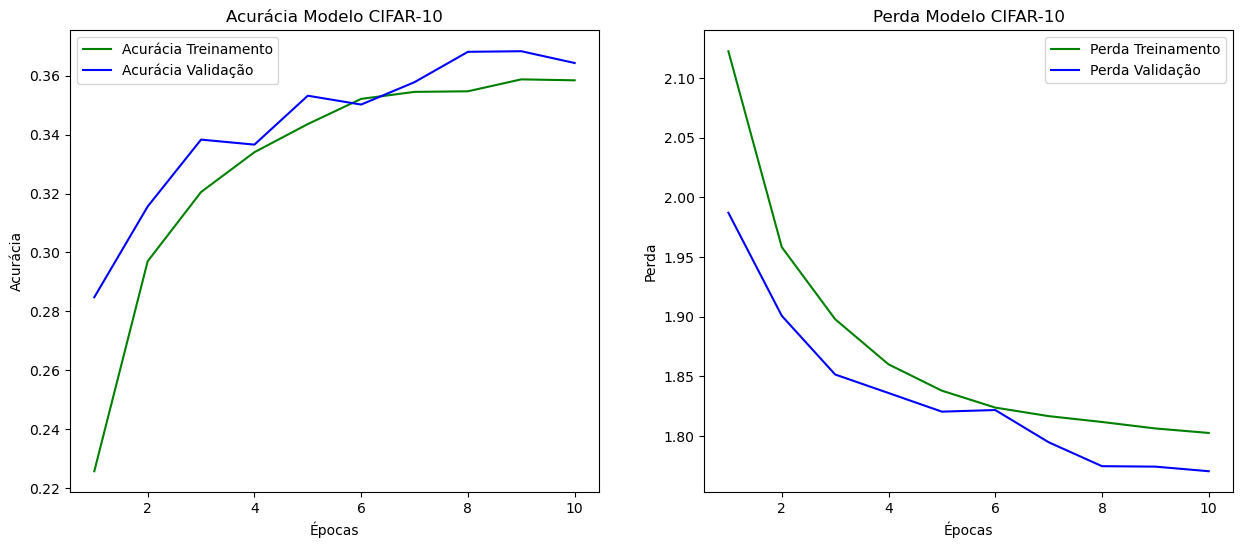

In [119]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), acc, 'g', label='Acurácia Treinamento')
plt.plot(range(1, 11), acc_vall, 'b', label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia Modelo CIFAR-10')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), loss, 'g', label='Perda Treinamento')
plt.plot(range(1, 11), loss_vall, 'b', label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda Modelo CIFAR-10')
plt.legend()
plt.show()

**Com a alteração da função de ativação para *sigmoid* e o otimizador *RMSprop*, o modelo teve uma maior acurácia e um menor erro, além disso pode-se observar uma que essas estimativas tem uma variância menor, indicando uma melhor comprensão da relação encontrada nos dados.**

6. **Desenvolva um modelo em que a taxa de Dropout seja adaptativa, alterando durante o treinamento com base na época ou na performance. Compare o desempenho com um modelo que utiliza uma taxa de Dropout fixa.**